# Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


In [26]:
boom_bike = pd.read_csv("C:\\Users\\DELL\\Desktop\\BoomBikesCaseStudy\\day.csv")

In [28]:
boom_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Lets inspect the various aspects of our data frame

In [29]:
boom_bike.shape

(730, 16)

In [30]:
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Step 2 :Exploratory Data Analysis - EDA

In [31]:
boom_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Checking for Duplicate Records

In [32]:
# Check for duplicate data
dups = boom_bike.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
boom_bike[dups]

Number of duplicate rows = 0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


We can clearly see that there are no duplicate records in the data set.

### Missing Value Treatment

In [33]:
boom_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Renaming the columns for the ease of understanding

In [34]:
boom_bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
boom_bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Mapping the variables season , month , weathersit , weekday for better readability

In [36]:
boom_bike['season']=boom_bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boom_bike['month']=boom_bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom_bike['weathersit']=boom_bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
boom_bike['weekday']=boom_bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

boom_bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Visualisation

#### 1. Visualising Categorical Variables

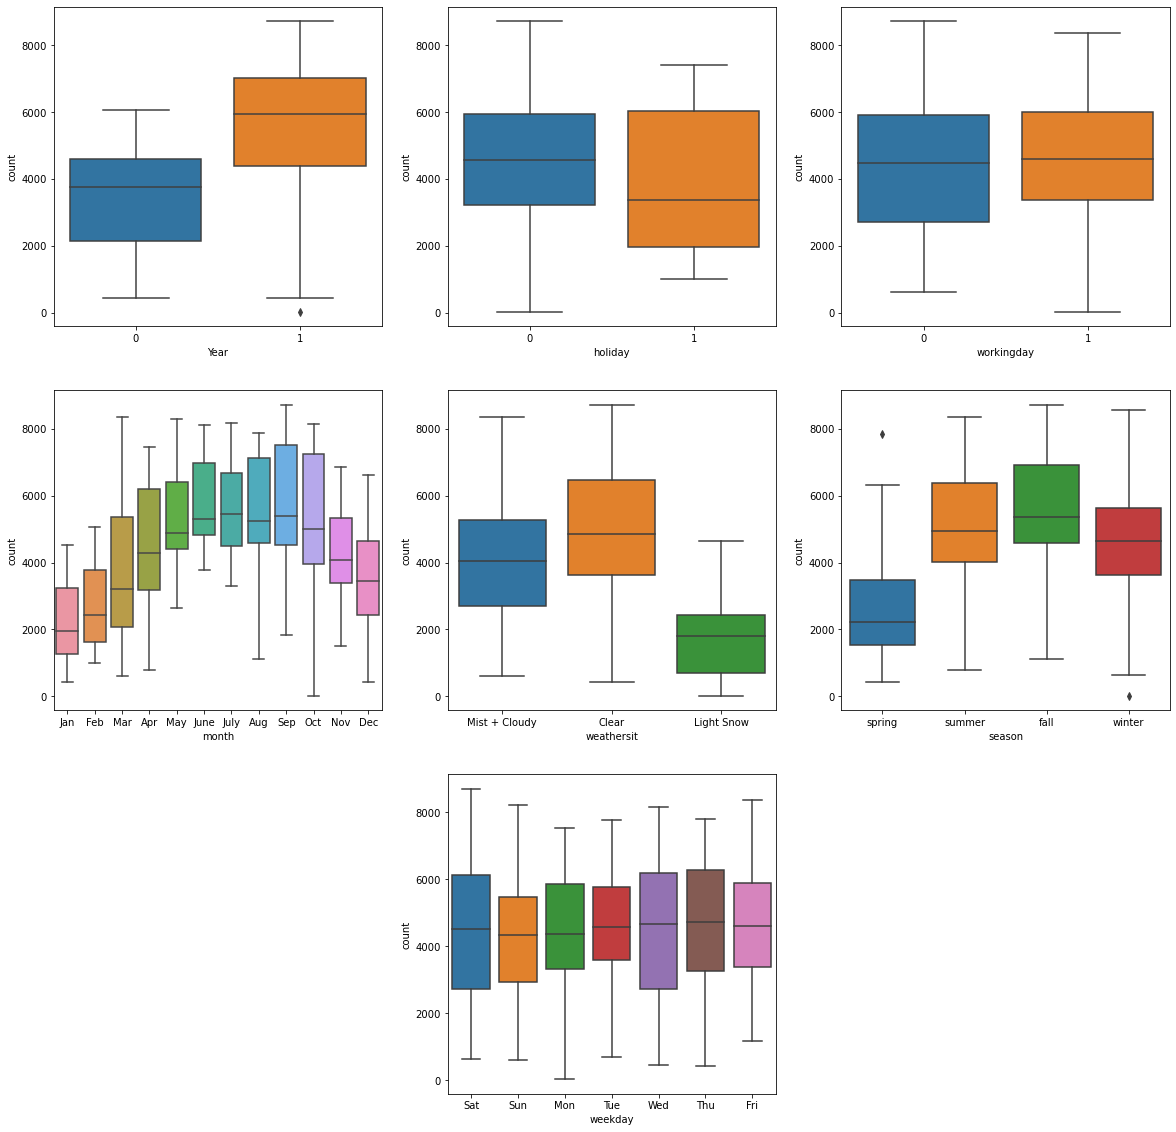

In [44]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'Year', y = 'count', data = boom_bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'count', data = boom_bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'count', data = boom_bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'month', y = 'count', data = boom_bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'count', data = boom_bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'season', y = 'count', data = boom_bike)
plt.subplot(3,3,8)
sns.boxplot(x = 'weekday', y = 'count', data = boom_bike)
plt.show()

The plots shows the relationship between categorical variables and a Target variable 'count'.

1. Bike Rentals are more during the Fall season and then in summer and very less during the spring.
2. Bike Rentals are more in the year 2019 compared to 2018.
3. Bike Rentals are more in clear or partly cloudy weather sitations and very less during snow and rainy conditions.
4. Bike Rentals are more on Saturday,wednesday followed by thursday,friday.

#### 2. Visualising Numeric Variables

Making a pairplot of the numeric variables, to visualise which variables are most correlated to the target variable 'count'.

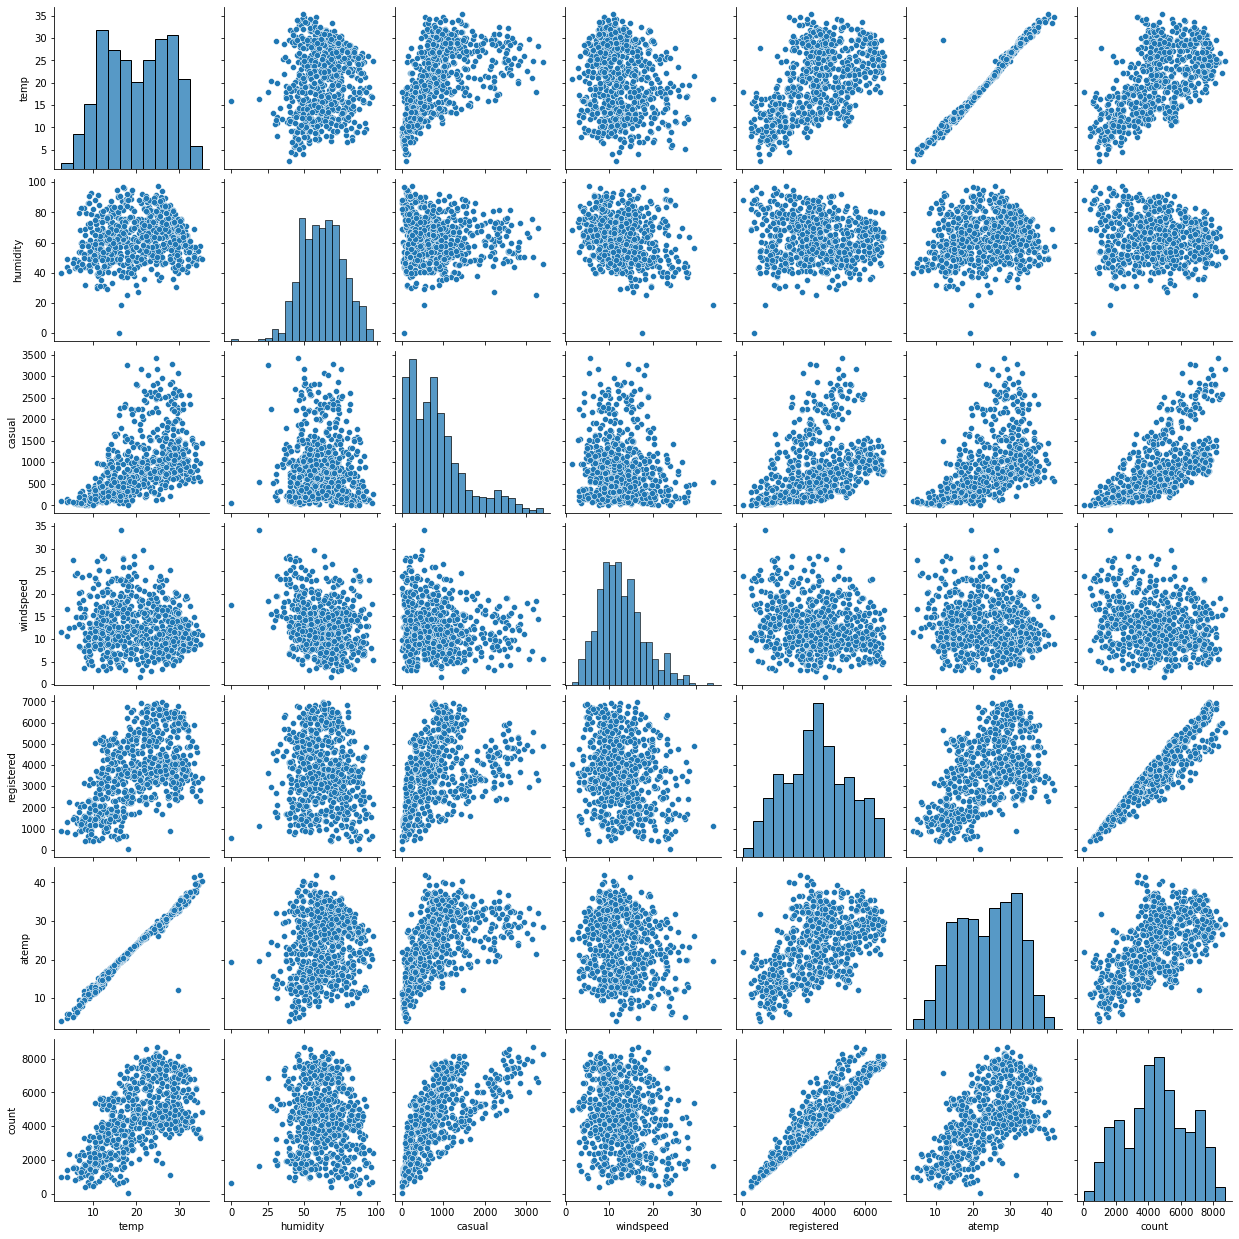

In [45]:
sns.pairplot(boom_bike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count'])
plt.show()

 So it is observed from the numeric variables that the bike rentals are more corelated to temperature.

#### Lets try to visualise the data related to temperature, humidity,windspeed on comparing with count using Scatter Plots

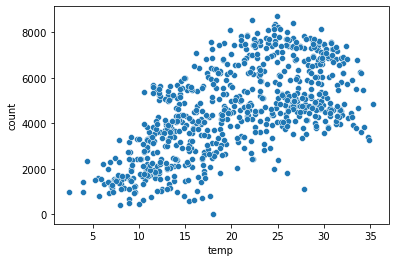

In [46]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=boom_bike)
plt.show()

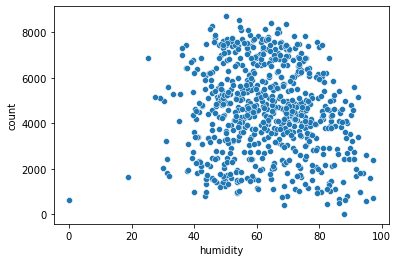

In [50]:
#scatter plot for humidity to count
sns.scatterplot(x='humidity', y='count',data=boom_bike)
plt.show()

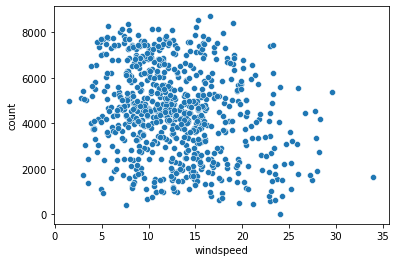

In [57]:
#scatter plot for windspeed to count
sns.scatterplot(x='windspeed', y='count',data=boom_bike)
plt.show()

#### Drop the unnecessary variables from the dataset
We can see the dataset has some variables that are not required. We can drop instant, dteday, casual, registered

In [51]:
#drop unnecessary columns
boom_bike=boom_bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
boom_bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


<AxesSubplot:>

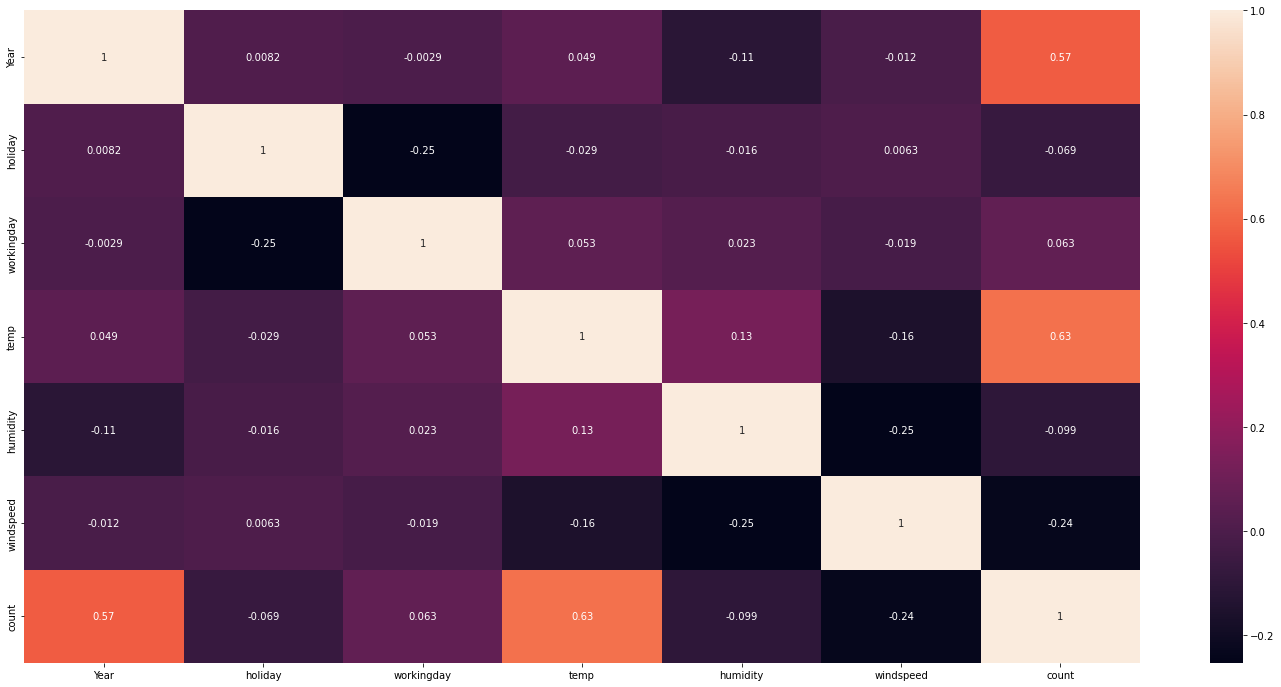

In [54]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(boom_bike.corr(), annot = True)

In [59]:
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


# Step 3 : Encoding

### Creating Dummy Variables

In [60]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

Season_condition=pd.get_dummies(boom_bike['season'],drop_first=True)
Weather_condition=pd.get_dummies(boom_bike['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(boom_bike['weekday'],drop_first=True)
Month=pd.get_dummies(boom_bike['month'],drop_first=True)

### Combining Numerical and Categorical dataframe

In [61]:
boom_bike=pd.concat([boom_bike,Season_condition],axis=1)
boom_bike=pd.concat([boom_bike,Weather_condition],axis=1)
boom_bike=pd.concat([boom_bike,Day_of_week],axis=1)
boom_bike=pd.concat([boom_bike,Month],axis=1)
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   Year           730 non-null    int64  
 2   month          730 non-null    object 
 3   holiday        730 non-null    int64  
 4   weekday        730 non-null    object 
 5   workingday     730 non-null    int64  
 6   weathersit     730 non-null    object 
 7   temp           730 non-null    float64
 8   humidity       730 non-null    float64
 9   windspeed      730 non-null    float64
 10  count          730 non-null    int64  
 11  spring         730 non-null    uint8  
 12  summer         730 non-null    uint8  
 13  winter         730 non-null    uint8  
 14  Light Snow     730 non-null    uint8  
 15  Mist + Cloudy  730 non-null    uint8  
 16  Mon            730 non-null    uint8  
 17  Sat            730 non-null    uint8  
 18  Sun       

In [62]:
boom_bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [63]:
#Deleting the orginal columns season, weathersit, weekday, month
boom_bike.drop(['season'],axis=1,inplace=True)
boom_bike.drop(['weathersit'],axis=1,inplace=True)
boom_bike.drop(['weekday'],axis=1,inplace=True)
boom_bike.drop(['month'],axis=1,inplace=True)
boom_bike.head()

,Year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Train Test Split

In [208]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
boom_bike_train, boom_bike_test = train_test_split(boom_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [209]:
boom_bike_train.shape


(510, 29)

In [210]:
boom_bike_test.shape

(219, 29)

In [211]:
boom_bike_train.head()

,Year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
boom_bike_test.head()

,Year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


# Step 4: Normalizing and Scaling

In [213]:
# initiate a object 
scaler = MinMaxScaler()

#create a list of the numeric variables required for rescaling
num_vars = ['temp','humidity','windspeed','count']

#fit on the data
boom_bike_train[num_vars] = scaler.fit_transform(boom_bike_train[num_vars])

In [214]:
boom_bike_train.head()

,Year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
#CREATING X AND Y
y_train = boom_bike_train.pop('count')
X_train = boom_bike_train
X_train.head()

,Year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Light Snow,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
boom_bike_train.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow', 'Mist + Cloudy', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

# Step 5: Feature Selection Techniques
* **Recursive Feature Elimination (RFE)** -
  Implementing the Recursive Feature Elimination method of feature ranking via the use of basic Linear Regression

In [217]:
#USING RFE APPROACH FOR FEATURE SELECTION
# WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [218]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Support':rfe.support_,
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Support,Ranking
0,Year,True,1
21,July,True,1
20,Jan,True,1
12,Sat,True,1
10,Mist + Cloudy,True,1
9,Light Snow,True,1
8,winter,True,1
27,Sep,True,1
6,spring,True,1
5,windspeed,True,1


In [219]:
col = X_train.columns[rfe.support_]
col

Index(['Year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow', 'Mist + Cloudy', 'Sat',
       'Jan', 'July', 'Sep'],
      dtype='object')

In [220]:
X_train_rfe = X_train[col]

# Step 6: Base Model Building model using statsmodel

In [221]:
X_train_rfe.shape

(510, 15)

In [222]:
X_train_sm = sm.add_constant(X_train_rfe)

In [223]:
lm = sm.OLS(y_train,X_train_sm).fit() # Running the linear model

In [224]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 07 May 2022   Prob (F-statistic):          2.31e-191
Time:                        08:11:20   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949

In [225]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
10,Mist + Cloudy,2.29
0,Year,2.09
11,Sat,1.98


#### COLUMN humidity HAS A VERY HIGH VIF SO WE DROP IT 

In [226]:
X_train_rfe = X_train_rfe.drop(['humidity'],axis=1)

In [227]:
X_train_rfe.shape

(510, 14)

In [228]:
X_train_sm = sm.add_constant(X_train_rfe)

In [229]:
lm = sm.OLS(y_train,X_train_sm).fit() # Running the linear model

In [230]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sat, 07 May 2022   Prob (F-statistic):          7.33e-189
Time:                        08:11:40   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1737      0.031      5.525

In [231]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,Year,2.08
7,winter,1.99
10,Sat,1.97
11,Jan,1.62
12,July,1.59


#### COLUMN holiday HAS A VERY HIGH P-Value SO WE DROP IT 

In [232]:
X_train_rfe = X_train_rfe.drop(['holiday'],axis=1)

In [233]:
X_train_sm = sm.add_constant(X_train_rfe)

In [234]:
lm = sm.OLS(y_train,X_train_sm).fit() # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Sat, 07 May 2022   Prob (F-statistic):          4.11e-189
Time:                        08:12:45   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1656      0.031      5.294

In [235]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,spring,2.99
5,summer,2.31
0,Year,2.08
6,winter,1.92
9,Sat,1.84
10,Jan,1.62
11,July,1.59


#### COLUMN Jan HAS A VERY HIGH P-Value SO WE DROP IT 

In [236]:
X_train_rfe = X_train_rfe.drop(['Jan'],axis=1)

In [237]:
X_train_sm = sm.add_constant(X_train_rfe)

lm_1 = sm.OLS(y_train,X_train_sm).fit() # Running the linear model

#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sat, 07 May 2022   Prob (F-statistic):          3.28e-189
Time:                        08:15:12   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1493      0.031      4.886

In [238]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,spring,2.38
5,summer,2.31
0,Year,2.07
6,winter,1.92
9,Sat,1.83
10,July,1.58
8,Mist + Cloudy,1.56


#### COLUMN July HAS A VERY HIGH P-Value SO WE DROP IT 

In [239]:
X_train_rfe = X_train_rfe.drop(['July'],axis=1)

In [240]:
X_train_sm = sm.add_constant(X_train_rfe)

lm_1 = sm.OLS(y_train,X_train_sm).fit() # Running the linear model

#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Sat, 07 May 2022   Prob (F-statistic):          6.86e-189
Time:                        08:17:56   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1405      0.031      4.599

In [241]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,spring,2.30
0,Year,2.07
5,summer,1.99
9,Sat,1.83
6,winter,1.77
8,Mist + Cloudy,1.56
10,Sep,1.23


#### COLUMN Windspeed WE DROP FOR HIGH VIF 

In [243]:
X_train_rfe = X_train_rfe.drop(['windspeed'],axis=1)

In [246]:
X_train_sm = sm.add_constant(X_train_rfe)

lm_2 = sm.OLS(y_train,X_train_sm).fit() # Running the linear model

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.5
Date:                Sat, 07 May 2022   Prob (F-statistic):          1.55e-182
Time:                        08:23:38   Log-Likelihood:                 484.95
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     499   BIC:                            -901.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0901      0.030      2.965

In [247]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
1,workingday,4.63
0,Year,2.07
8,Sat,1.81
4,summer,1.74
3,spring,1.70
5,winter,1.59
7,Mist + Cloudy,1.56
9,Sep,1.23
6,Light Snow,1.07


#### ADDING Sunday AND CHECKING IF MODEL IMPROVES

In [248]:
X_train_rfe['Sun']=boom_bike_train['Sun']

In [249]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train,X_train_sm).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.6
Date:                Sat, 07 May 2022   Prob (F-statistic):          3.18e-182
Time:                        08:28:40   Log-Likelihood:                 487.05
No. Observations:                 510   AIC:                            -950.1
Df Residuals:                     498   BIC:                            -899.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0408      0.039      1.052

In [250]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,15.64
2,temp,11.72
8,Sat,4.28
10,Sun,4.07
3,spring,3.33
5,winter,2.50
4,summer,2.21
0,Year,2.07
7,Mist + Cloudy,1.58
9,Sep,1.23


#### Adding Sunday increases the VIF of others and also has very high p-value so dropping it

In [251]:
X_train_rfe = X_train_rfe.drop(['Sun'],axis=1)

#### ADDING Feb AND CHECKING IF MODEL IMPROVES

In [252]:
X_train_rfe['Feb']=boom_bike_train['Feb']

In [253]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train,X_train_sm).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.4
Date:                Sat, 07 May 2022   Prob (F-statistic):          2.45e-181
Time:                        08:32:30   Log-Likelihood:                 484.95
No. Observations:                 510   AIC:                            -945.9
Df Residuals:                     498   BIC:                            -895.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0901      0.030      2.958

In [254]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
1,workingday,4.63
3,spring,2.12
0,Year,2.07
8,Sat,1.82
4,summer,1.74
5,winter,1.59
7,Mist + Cloudy,1.56
10,Feb,1.38
9,Sep,1.23


#### Feb has very high p-value so dropping it

In [255]:
X_train_rfe = X_train_rfe.drop(['Feb'],axis=1)

#### ADDING July AND CHECKING IF MODEL IMPROVES

In [256]:
X_train_rfe['July']=boom_bike_train['July']

In [257]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_5 = sm.OLS(y_train,X_train_sm).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sat, 07 May 2022   Prob (F-statistic):          9.28e-183
Time:                        08:34:29   Log-Likelihood:                 488.32
No. Observations:                 510   AIC:                            -952.6
Df Residuals:                     498   BIC:                            -901.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0989      0.030      3.251

In [258]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.03
1,workingday,4.63
0,Year,2.07
4,summer,2.05
8,Sat,1.81
3,spring,1.78
5,winter,1.74
10,July,1.58
7,Mist + Cloudy,1.56
9,Sep,1.34


#### July has a very high p-value and also doesnot improve the model so dropping July

In [259]:
X_train_rfe = X_train_rfe.drop(['July'],axis=1)

#### ADDING Oct AND CHECKING IF MODEL IMPROVES

In [260]:
X_train_rfe['Oct']=boom_bike_train['Oct']

In [261]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_6 = sm.OLS(y_train,X_train_sm).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.7
Date:                Sat, 07 May 2022   Prob (F-statistic):          2.90e-182
Time:                        08:35:25   Log-Likelihood:                 487.14
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     498   BIC:                            -899.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1020      0.031      3.308

In [262]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.82
1,workingday,4.67
5,winter,2.12
0,Year,2.07
8,Sat,1.82
4,summer,1.74
3,spring,1.70
10,Oct,1.60
7,Mist + Cloudy,1.56
9,Sep,1.25


#### Oct has a very high p-value hence dropping it

In [263]:
X_train_rfe = X_train_rfe.drop(['Oct'],axis=1)

#### ADDING Mon AND CHECKING IF MODEL IMPROVES

In [264]:
X_train_rfe['Mon']=boom_bike_train['Mon']

In [265]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_7 = sm.OLS(y_train,X_train_sm).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.1
Date:                Sat, 07 May 2022   Prob (F-statistic):          5.35e-182
Time:                        08:37:11   Log-Likelihood:                 486.52
No. Observations:                 510   AIC:                            -949.0
Df Residuals:                     498   BIC:                            -898.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0936      0.030      3.078

In [266]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.73
1,workingday,4.69
0,Year,2.07
8,Sat,1.82
4,summer,1.75
3,spring,1.71
5,winter,1.61
7,Mist + Cloudy,1.56
9,Sep,1.23
10,Mon,1.23


#### Mon has a very high p-value and also doesnot improve the model so dropping Mon

In [267]:
X_train_rfe = X_train_rfe.drop(['Mon'],axis=1)

#### ADDING Mar AND CHECKING IF MODEL IMPROVES

In [268]:
X_train_rfe['Mar']=boom_bike_train['Mar']

In [269]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_8 = sm.OLS(y_train,X_train_sm).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.8
Date:                Sat, 07 May 2022   Prob (F-statistic):          6.55e-182
Time:                        08:38:07   Log-Likelihood:                 486.31
No. Observations:                 510   AIC:                            -948.6
Df Residuals:                     498   BIC:                            -897.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0929      0.030      3.056

In [270]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.73
1,workingday,4.64
0,Year,2.07
3,spring,1.88
8,Sat,1.82
4,summer,1.80
5,winter,1.60
7,Mist + Cloudy,1.56
10,Mar,1.28
9,Sep,1.23


#### Mar has high p-value so dropping Mar

In [271]:
X_train_rfe = X_train_rfe.drop(['Mar'],axis=1)

#### ADDING Tue AND CHECKING IF MODEL IMPROVES

In [272]:
X_train_rfe['Tue']=boom_bike_train['Tue']

In [273]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_9 = sm.OLS(y_train,X_train_sm).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sat, 07 May 2022   Prob (F-statistic):          1.62e-181
Time:                        08:38:48   Log-Likelihood:                 485.38
No. Observations:                 510   AIC:                            -946.8
Df Residuals:                     498   BIC:                            -895.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0896      0.030      2.946

In [274]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,4.87
2,temp,4.73
0,Year,2.07
8,Sat,1.81
4,summer,1.74
3,spring,1.70
5,winter,1.59
7,Mist + Cloudy,1.56
10,Tue,1.25
9,Sep,1.23


#### Tue has high p-value so dropping Tue

In [275]:
X_train_rfe = X_train_rfe.drop(['Tue'],axis=1)

#### ADDING Nov AND CHECKING IF MODEL IMPROVES

In [276]:
X_train_rfe['Nov']=boom_bike_train['Nov']

In [277]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_10 = sm.OLS(y_train,X_train_sm).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.0
Date:                Sat, 07 May 2022   Prob (F-statistic):          5.46e-182
Time:                        08:39:21   Log-Likelihood:                 486.50
No. Observations:                 510   AIC:                            -949.0
Df Residuals:                     498   BIC:                            -898.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0994      0.031      3.227

In [278]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
1,workingday,4.63
5,winter,2.16
0,Year,2.07
8,Sat,1.81
4,summer,1.74
3,spring,1.70
7,Mist + Cloudy,1.56
10,Nov,1.55
9,Sep,1.24


#### Nov has high p-value so dropping Nov

In [279]:
X_train_rfe = X_train_rfe.drop(['Nov'],axis=1)

#### ADDING Wed AND CHECKING IF MODEL IMPROVES

In [280]:
X_train_rfe['Wed']=boom_bike_train['Wed']

In [281]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_11 = sm.OLS(y_train,X_train_sm).fit()
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.7
Date:                Sat, 07 May 2022   Prob (F-statistic):          1.98e-181
Time:                        08:39:59   Log-Likelihood:                 485.17
No. Observations:                 510   AIC:                            -946.3
Df Residuals:                     498   BIC:                            -895.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0909      0.030      2.986

In [282]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,4.90
2,temp,4.72
0,Year,2.07
8,Sat,1.81
4,summer,1.74
3,spring,1.70
5,winter,1.59
7,Mist + Cloudy,1.56
10,Wed,1.32
9,Sep,1.23


#### Wed has high p-value so dropping Wed

In [283]:
X_train_rfe = X_train_rfe.drop(['Wed'],axis=1)

#### ADDING Dec AND CHECKING IF MODEL IMPROVES

In [284]:
X_train_rfe['Dec']=boom_bike_train['Dec']

In [285]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_12 = sm.OLS(y_train,X_train_sm).fit()
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sat, 07 May 2022   Prob (F-statistic):          1.61e-181
Time:                        08:40:26   Log-Likelihood:                 485.38
No. Observations:                 510   AIC:                            -946.8
Df Residuals:                     498   BIC:                            -895.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0946      0.031      3.072

In [286]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.75
1,workingday,4.66
0,Year,2.07
8,Sat,1.83
5,winter,1.79
4,summer,1.74
3,spring,1.73
7,Mist + Cloudy,1.56
10,Dec,1.26
9,Sep,1.23


#### Dec has high p-value so dropping Dec

In [287]:
X_train_rfe = X_train_rfe.drop(['Dec'],axis=1)

#### ADDING May AND CHECKING IF MODEL IMPROVES

In [288]:
X_train_rfe['May']=boom_bike_train['May']

In [289]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_13 = sm.OLS(y_train,X_train_sm).fit()
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.2
Date:                Sat, 07 May 2022   Prob (F-statistic):          1.22e-181
Time:                        08:42:11   Log-Likelihood:                 485.67
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     498   BIC:                            -896.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0965      0.031      3.128

In [290]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.64
4,summer,2.24
0,Year,2.08
8,Sat,1.82
3,spring,1.70
5,winter,1.59
7,Mist + Cloudy,1.57
10,May,1.55
9,Sep,1.23


#### May has high p-value so dropping May

In [291]:
X_train_rfe = X_train_rfe.drop(['May'],axis=1)

## We have considered all columns and checked.Now we stop our model building and check  which model can we should choose

## Our final model lm_2 seems to give good result so we choose it.

# Step 6: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [292]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: count, Length: 510, dtype: float64

In [302]:
X_train_rfe

,Year,workingday,temp,spring,summer,winter,Light Snow,Mist + Cloudy,Sat,Sep
653,1,1,0.509887,0,0,1,0,0,0,0
576,1,1,0.815169,0,0,0,0,0,0,0
426,1,0,0.442393,1,0,0,0,1,1,0
728,1,0,0.245101,1,0,0,0,0,0,0
482,1,0,0.395666,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
526,1,1,0.824514,0,1,0,0,1,0,0
578,1,1,0.863973,0,0,0,0,0,0,0
53,0,1,0.202618,1,0,0,0,0,0,0
350,0,0,0.248216,0,0,1,0,1,1,0


In [298]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.5
Date:                Sat, 07 May 2022   Prob (F-statistic):          1.55e-182
Time:                        08:51:13   Log-Likelihood:                 484.95
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     499   BIC:                            -901.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0901      0.030      2.965      0.003       0.030       0.150
Year              0.2333      0.008     27.587      0.000       0.217       0.250
workingday        0.0568      0.011      4.948      0.000       0.034       0.079
temp              0.4918      0.034     14.587      0.000       0.426       0.558
spring           -0.0647      0.021     -3.049      0.002      -0.106      -0.023
summer            0.0516      0.014      3.567      0.000       0.023       0.080
winter            0.0984      0.017      5.758      0.000       0.065       0.132
Light Snow       -0.3051      0.025    -12.064      0.000      -0.355      -0.255
Mist + Cloudy    -0.0800      0.009     -8.886      0.000      -0.098      -0.062
Sat               0.0647      0.015      4.380      0.000       0.036       0.094
Sep               0.0915      0.017      5.507      0.000       0.059       0.124
==============================================================================
Omnibus:                       77.818   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.021
Skew:                          -0.753   Prob(JB):                     4.09e-46
Kurtosis:                       5.751   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
X_train_sm = sm.add_constant(X_train_rfe)

In [304]:
#y train predicted
y_train_pred = lm_2.predict(X_train_sm)

<Figure size 432x288 with 0 Axes>

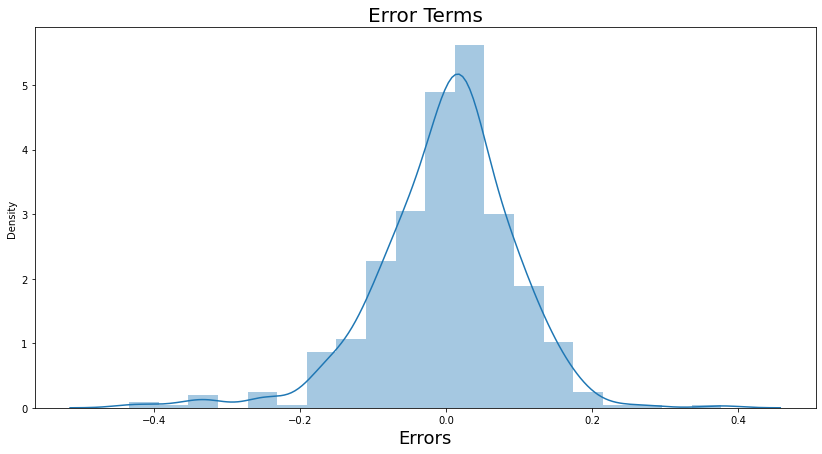

In [305]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

# Step 7: Making Predictions

Applying the scaling on the test data

In [306]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
boom_bike_test[num_vars] = scaler.transform(boom_bike_test[num_vars])
boom_bike_test.head()

,Year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Dividing into X_test and y_test

In [307]:
y_test = boom_bike_test.pop('count')
X_test = boom_bike_test
X_test.describe()

,Year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Light Snow,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.255708,0.264840,0.232877,0.027397,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.437258,0.442259,0.423633,0.163612,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [309]:
#Columns
X_train_rfe.columns

Index(['Year', 'workingday', 'temp', 'spring', 'summer', 'winter',
       'Light Snow', 'Mist + Cloudy', 'Sat', 'Sep'],
      dtype='object')

In [310]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_sm = sm.add_constant(X_test_new)
X_test_sm.head()

,const,Year,workingday,temp,spring,summer,winter,Light Snow,Mist + Cloudy,Sat,Sep
184,1.0,0,0,0.831783,0,0,0,0,1,0,0
535,1.0,1,1,0.901354,0,1,0,0,0,0,0
299,1.0,0,1,0.511964,0,0,1,0,1,0,0
221,1.0,0,1,0.881625,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0,1,0,0,0,0,0


In [311]:
# Making predictions
y_pred = lm_2.predict(X_test_sm)

### Finding R2 and Adjusted R2 for the test 

In [312]:
#Evaluate R-square for test

r2_score(y_test,y_pred)

0.8110959585457425

In [314]:
#Adjusted R^2 for test
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8110959585)*(10-1)/(10-1-1)
print(Adj_r2)

0.7874829533125001


# Step 8: Model Evaluation

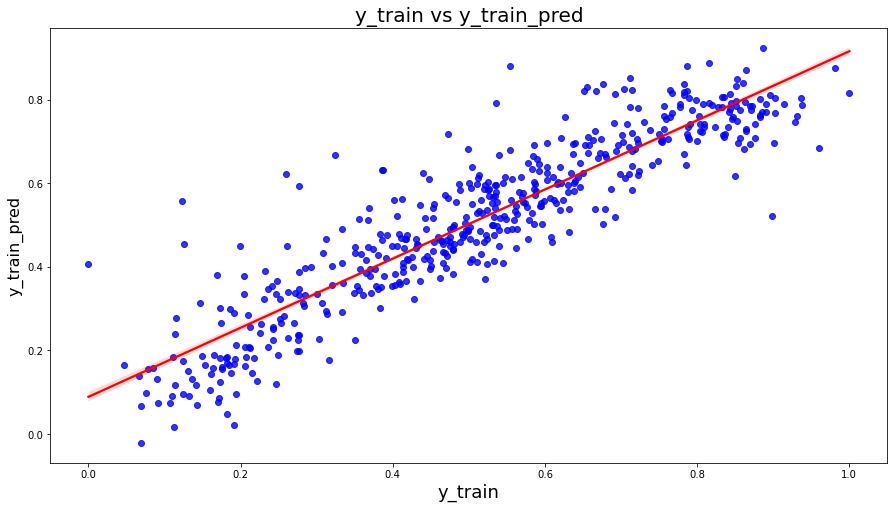

In [315]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_train, y=y_train_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label
plt.show()

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

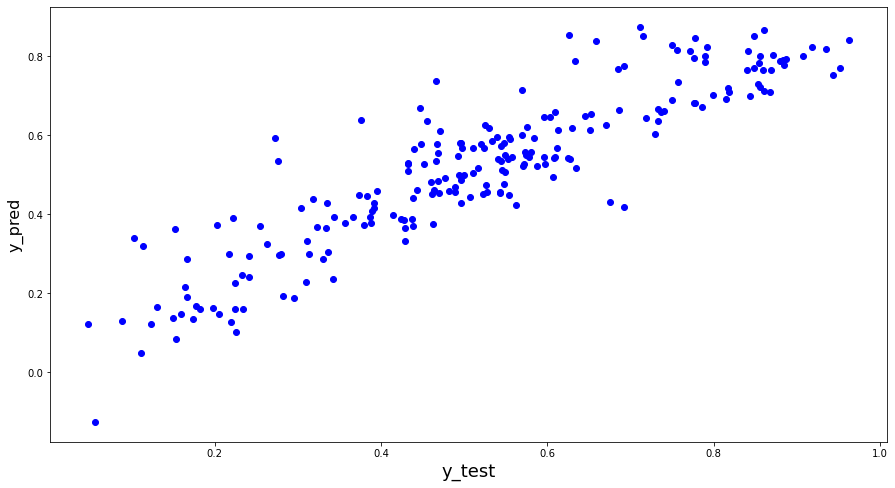

In [316]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

## We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

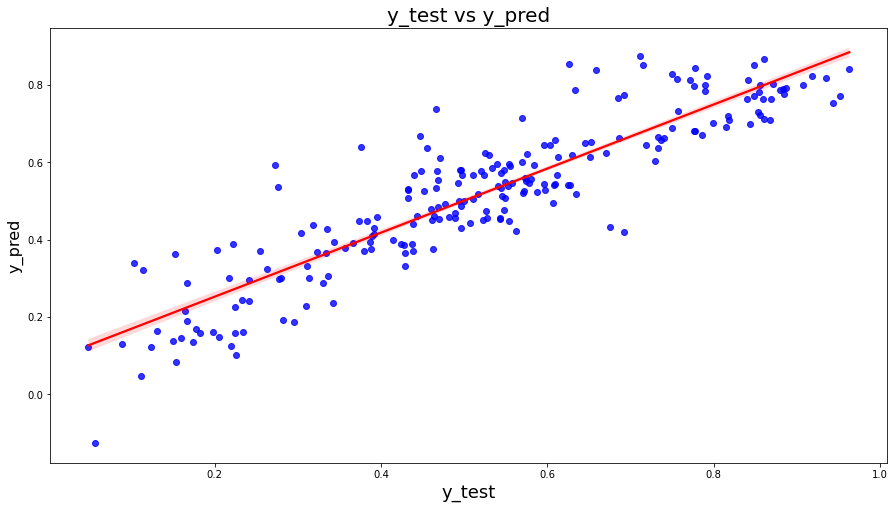

In [317]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [318]:
residuals_test = y_test - y_pred
residuals_train = y_train - y_train_pred

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 0, 'Errors')

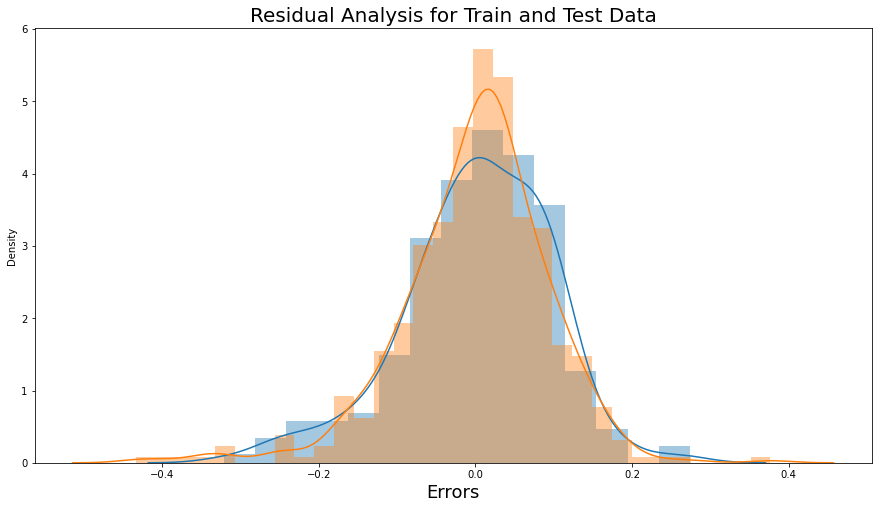

In [319]:
plt.figure(figsize=(15,8))
plt.title('Residual Analysis for Train and Test Data', fontsize=20)
print(sns.distplot(residuals_test))
print(sns.distplot(residuals_train))
plt.xlabel('Errors', fontsize = 18)  # X-label

### Calculating the R^2 for the test

In [320]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8110959585457425

### Final Model

In [321]:
print(X_train_rfe.columns)
print(lm_2.summary())

Index(['Year', 'workingday', 'temp', 'spring', 'summer', 'winter',
       'Light Snow', 'Mist + Cloudy', 'Sat', 'Sep'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.5
Date:                Sat, 07 May 2022   Prob (F-statistic):          1.55e-182
Time:                        09:09:11   Log-Likelihood:                 484.95
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     499   BIC:                            -901.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.02

## We can see that the equation for best fitted line is:


#### count  =   0.0901 + 0.2333 X Year   +   0.0568 X workingday   +   0.4918 X temp  -   0.0647 X spring   +   0.0516 X summer   +  0.0984 X winter   -   0.3051 X Light Snow   -   0.08 X (Mist + Cloudy)   + 0.0647 X Sat   +   0.0915 X Sep

Final Result Comparison between Train model and Test:
- Train R^2 : 0.826
- Test R^2: 0.811
- Test Adjusted R^2: 0.787
- Train Adjusted R^2 : 0.804

- Difference in R^2 between train and test: 1.8%
- Difference in adjusted R^2 between Train and test: 2.1%

### Interpretation from the model built:
- We can see that temperature variable is having the highest coefficient 0.4918, which signifises that if the temperature increases by one unit the number of bike rentals increases by 0.4918 units.
- We also see there are some variables with negative coefficients, that suggests that as the independent variable increases, the dependent variable tends to decrease. Spring, mist cloudy , light snow variables have negative coefficient.